In [4]:
import numpy as np
#import s3fs
#import proplot
import os

from matplotlib import pyplot as plt
import polars
import json
import pyarrow
import pyarrow.parquet as pyarrow_parquet
import pandas as pd
import dask.dataframe as dd

In [6]:
i_platform = 'xbt'
year_to_get = 2000

CODA_path = '/scratch3/cow074/CODAv1/parquet'
file_name = 'WOD2018_CODA_' + str(year_to_get) + '_' + str(i_platform) + '.parquet'
 


wod_dataframe = dd.read_parquet(os.path.join(CODA_path,str(year_to_get),file_name)) #, engine='pyarrow')


In [16]:
wod_dataframe['Temperature'].compute()

0           23.730000
1           23.719999
2           23.709999
3           23.700001
4           23.700001
              ...    
25025029     4.758000
25025030     4.762000
25025031     4.745000
25025032     4.756000
25025033     4.747000
Name: Temperature, Length: 25025034, dtype: float32

In [17]:
folder = '/scratch3/cow074/AQC_flag_summaries'
csv_file = os.path.join(folder, 'XBT_summary.csv')
df = dd.read_csv(csv_file)     

In [18]:
# add column names to the dataframe
df.columns = ['wod_unique_cast', 'depthNumber','Temperature_iquodflag']       
df = df.sort_values(by=['wod_unique_cast', 'depthNumber'])
df

,wod_unique_cast,depthNumber,Temperature_iquodflag
npartitions=174,,,
,int64,int64,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [20]:
wod_dataframe['depthNumber'] = wod_dataframe.groupby('wod_unique_cast').cumcount()

In [21]:
wod_dataframe = wod_dataframe.merge(df, on=['wod_unique_cast', 'depthNumber'], how='left')

In [ ]:
wod_dataframe['Temperature'].compute()

In [105]:

#df.filter(pl.col("foo") > 1)

wod_australia = wod_dataframe.filter( ((polars.col("lat") > -50) & (polars.col("lat") <=0  ))  & 
                                      ((polars.col("lon") > 90)  & (polars.col("lon") <=180 ))  )

CODA_id = wod_australia['CODA_id'].unique()
WOD_id  = wod_australia['wod_unique_cast'].unique()

unique_lon_lats = wod_australia.group_by("CODA_id").agg(polars.col("lon"),polars.col("lat"),
                                                        polars.col("Temperature"),polars.col('z') ,maintain_order=True)  #.drop_nulls(group_columns)
unique_lon_lats_blah = wod_australia.group_by("CODA_id").agg(polars.mean("lon"),polars.mean("lat"),
                                                        polars.col("Temperature"),polars.col("Temperature_WODflag"),polars.col('z') ,maintain_order=True)

#unique_lons = wod_australia['lon'].unique()
#unique_lats = wod_australia['lat'].unique()


#plt.scatter(unique_lons['lon'],unique_lats['lat'])
#plt.scatter(wod_australia['lon'],wod_australia['lat'],c='r')





In [107]:
unique_lon_lats_blah

CODA_id,lon,lat,Temperature,Temperature_WODflag,z,maintain_order
binary,f64,f64,list[f64],list[f64],list[f32],bool
"b""WODpfl2018062480955""",108.915001,-46.924,"[7.965, 7.966, … 2.189]","[0.0, 0.0, … 0.0]","[5.077476, 6.763328, … 1972.226929]",true
"b""WODpfl2018031634768""",122.193962,-42.671509,"[13.479, 13.478, … 2.545]","[0.0, 0.0, … 0.0]","[0.753991, 0.873042, … 1984.105347]",true
"b""WODpfl20181025144085""",155.554001,-35.997002,"[22.017, 22.017, … 2.374]","[0.0, 0.0, … 0.0]","[4.020369, 5.807175, … 1969.203613]",true
"b""WODpfl2018070887195""",117.406303,-37.863602,"[14.752, 14.752, … 2.622]","[0.0, 0.0, … 0.0]","[4.297607, 5.885614, … 1975.642456]",true
"b""WODpfl20180821107282""",145.777359,-12.96655,"[25.164, 25.167999, … 3.579]","[0.0, 0.0, … 0.0]","[0.715853, 1.113548, … 1194.837402]",true
…,…,…,…,…,…,…
"b""WODpfl2018042754450""",154.545319,-10.17789,"[29.302, 29.299999, … 4.332]","[0.0, 0.0, … 0.0]","[1.153434, 2.028449, … 1025.240723]",true
"b""WODpfl2018042653823""",176.742996,-8.539,"[29.885, 29.688999, … 2.192]","[0.0, 0.0, … 0.0]","[4.275836, 9.943667, … 1979.415527]",true
"b""WODpfl20181230175306""",160.200455,-16.008011,"[28.039, 28.040001, … 2.335]","[0.0, 0.0, … 0.0]","[0.437407, 0.477171, … 1978.831543]",true


In [117]:
current_profile.with_columns(polars.when(polars.col("Temperature_WODflag") != 0).then(np.nan))

thread '<unnamed>' panicked at crates/polars-core/src/series/comparison.rs:229:9:
called `Result::unwrap()` on an `Err` value: SchemaMismatch(ErrString("invalid series dtype: expected `List`, got `f64`"))


PanicException: called `Result::unwrap()` on an `Err` value: SchemaMismatch(ErrString("invalid series dtype: expected `List`, got `f64`"))

(0.0, 9.0)

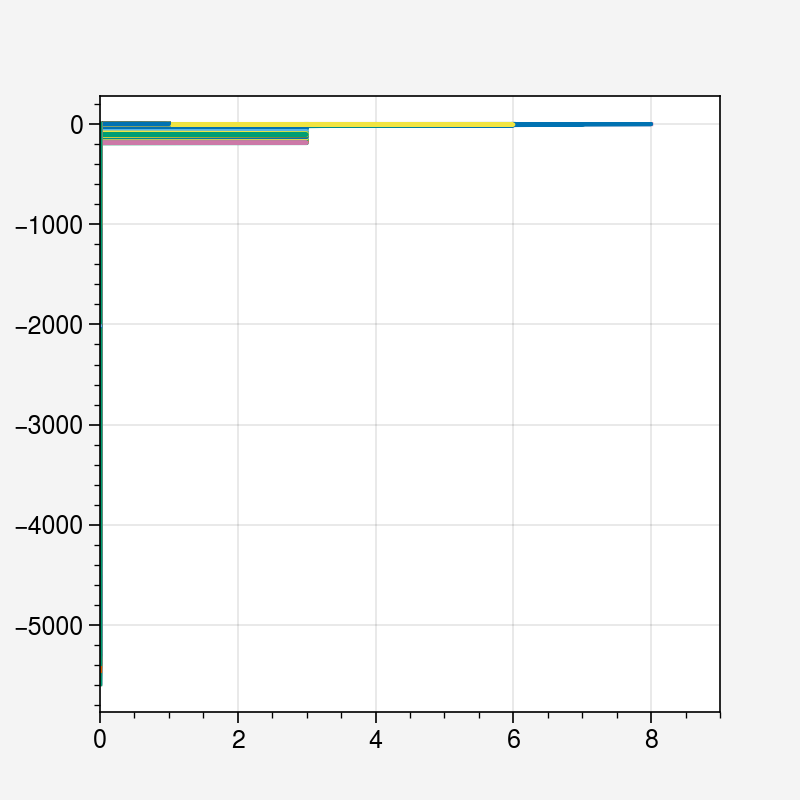

In [109]:


for i_profile in range(0,len(CODA_id)):
    #print(CODA_id[i_profile])
    current_profile = unique_lon_lats_blah.filter(polars.col("CODA_id") == CODA_id[i_profile])['Temperature','z','Temperature_WODflag']

    plt.plot(current_profile['Temperature_WODflag'].to_numpy()[0],-current_profile['z'].to_numpy()[0])
plt.xlim([0,9])
    


#

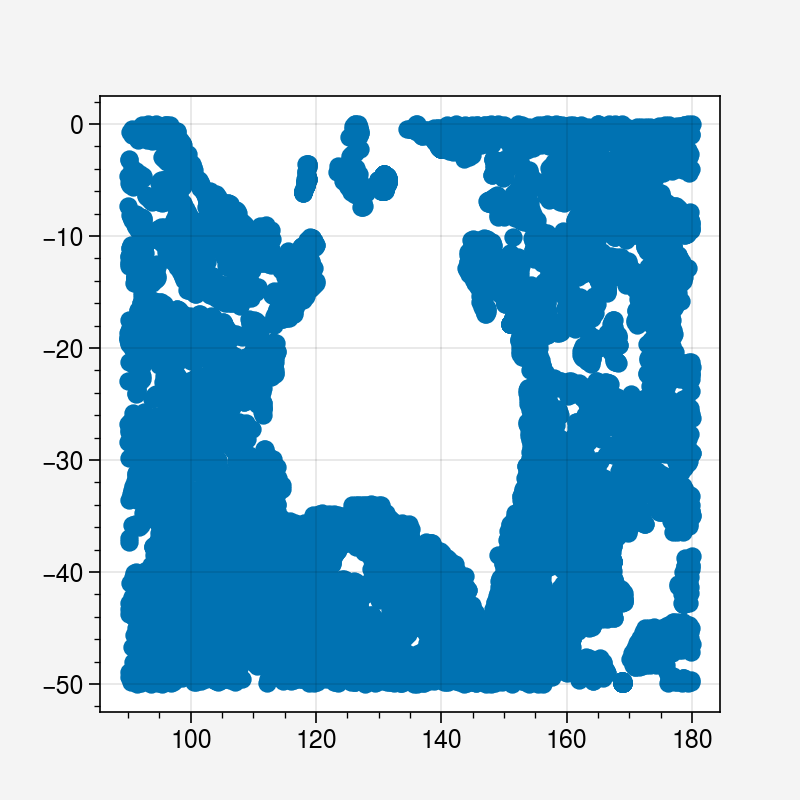

In [81]:
plt.scatter(unique_lon_lats_blah['lon'],unique_lon_lats_blah['lat'])
#plt.scatter(wod_australia['lon'],wod_australia['lat'],c='r')

In [118]:
current_profile['Temperature']

Temperature
list[f64]
"[16.108999, 16.075001, … 2.467]"


In [125]:
current_profile['Temperature_WODflag'].log10()

thread '<unnamed>' panicked at /home/conda/feedstock_root/build_artifacts/polars_1730209252377/work/crates/polars-ops/src/series/ops/log.rs:38:45:
called `Result::unwrap()` on an `Err` value: InvalidOperation(ErrString("cannot cast List type (inner: 'Float64', to: 'Float64')"))


PanicException: called `Result::unwrap()` on an `Err` value: InvalidOperation(ErrString("cannot cast List type (inner: 'Float64', to: 'Float64')"))

In [50]:
unique_lats_mean.filter(polars.col("CODA_id") == 'WODpfl20181009135801')

CODA_id,lat
binary,f64
"b""WODpfl20181009135801""",-10.53


In [49]:
wod_australia.filter(polars.col("CODA_id") == 'WODpfl20181009135801')['lat']

lat
f64
-10.53
-10.53
-10.53
-10.53
-10.53
…
-10.53
-10.53
-10.53
